In [1]:
import sys
# TODO: clean this up
sys.path.insert(0, "/Users/danieldubovski/projects/deep_query_optimization/")
from dqo import datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from dqo.relational import SQLParser
import scipy.stats
from collections import Counter

In [3]:
dse = datasets.ExtendedQueriesDataset("imdb:extended")

In [15]:
dso = datasets.QueriesDataset("imdb:optimized")

In [4]:
dse.load()

2021-07-17 14:40:35,557 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/extended/runtimes/dqo.cayusbvr71xr.us-east-1.rds.amazonaws.com_imdb_1626365832_extended.csv [1/2]
2021-07-17 14:40:38,671 | dqo.datasets | INFO | Loaded 27512 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/extended/runtimes/dqo.cayusbvr71xr.us-east-1.rds.amazonaws.com_imdb_1626365832_extended.csv [1/2]
2021-07-17 14:40:38,672 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/extended/runtimes/dqo.cayusbvr71xr.us-east-1.rds.amazonaws.com_imdb_1626442217_extended.csv [2/2]
2021-07-17 14:40:41,636 | dqo.datasets | INFO | Loaded 27512 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/extended/runtimes/dqo.cayusbvr71xr.us-east-1.rds.amazonaws.com_imdb_1626442217_extended.csv [2/2]


,query,runtime,plan,bucket
0,"SELECT MIN(company_name.country_code), MIN(aka...",0.545321,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",-1
1,"SELECT MIN(movie_companies.company_type_id), M...",0.275605,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",-2
2,"SELECT MIN(movie_companies.company_id), MIN(co...",0.615053,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",-1
3,"SELECT MIN(movie_companies.company_id), MIN(mo...",1.001045,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",0
4,"SELECT MIN(movie_companies.company_id), MIN(mo...",0.829076,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",0
...,...,...,...,...
27507,"SELECT MIN(company_type.id), MIN(person_info.i...",0.004913,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",-3
27508,"SELECT MIN(movie_companies.company_id), MIN(mo...",0.879737,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",0
27509,"SELECT MIN(movie_companies.company_id), MIN(mo...",0.780999,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",0
27510,"SELECT MIN(movie_companies.company_id), MIN(mo...",0.587680,"{""Node Type"": ""Aggregate"", ""Strategy"": ""Plain""...",-1


In [16]:
dso.load()

2021-07-17 14:48:14,033 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/test.csv [1/2]
2021-07-17 14:48:14,107 | dqo.datasets | INFO | Loaded 2752 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/test.csv [1/2]
2021-07-17 14:48:14,108 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/train.csv [2/2]
2021-07-17 14:48:14,687 | dqo.datasets | INFO | Loaded 24760 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/train.csv [2/2]


,query,runtime,bucket
0,"SELECT MIN(company_name.country_code), MIN(aka...",0.651022,-1
1,"SELECT MIN(movie_companies.company_type_id), M...",1.054200,0
2,"SELECT MIN(movie_companies.company_id), MIN(co...",0.770489,0
3,"SELECT MIN(movie_companies.company_id), MIN(mo...",1.287898,0
4,"SELECT MIN(movie_companies.company_id), MIN(mo...",1.087111,0
...,...,...,...
24755,"SELECT MIN(company_type.id), MIN(person_info.i...",0.355066,-1
24756,"SELECT MIN(movie_companies.company_id), MIN(mo...",1.697944,1
24757,"SELECT MIN(movie_companies.company_id), MIN(mo...",1.423282,1
24758,"SELECT MIN(movie_companies.company_id), MIN(mo...",0.896616,0


In [ ]:
pd.set_option('display.max_colwidth', None)
print(df.query('runtime > 10')[:1].query)

In [11]:
df = dse.df

<AxesSubplot:>

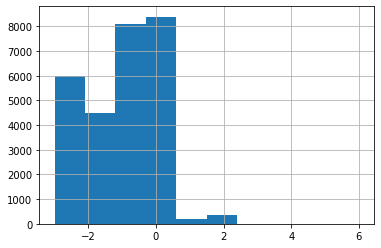

In [14]:
df[:27512].bucket.hist()

<AxesSubplot:>

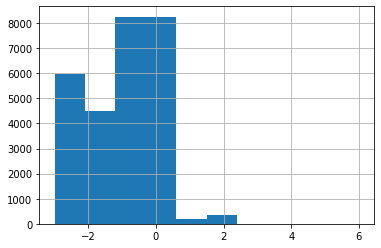

In [13]:
df[27512:].bucket.hist()

<AxesSubplot:>

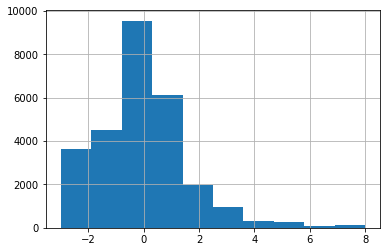

In [19]:
dso.df[:].bucket.hist()

In [30]:
df.groupby('query').aggregate()

query  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [2]:
dss = [
    datasets.QueriesDataset("imdb:optimized"), 
    datasets.QueriesDataset("tpch:optimized"),  
    datasets.QueriesDataset("tpcd:optimized"), 
    datasets.QueriesDataset("tpcds:optimized")
]

In [3]:
dfs = [ds.load() for ds in dss]

2021-02-24 21:40:25,762 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/test.csv [1/2]
2021-02-24 21:40:25,837 | dqo.datasets | INFO | Loaded 2752 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/test.csv [1/2]
2021-02-24 21:40:25,838 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/train.csv [2/2]
2021-02-24 21:40:26,400 | dqo.datasets | INFO | Loaded 24760 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/train.csv [2/2]
2021-02-24 21:40:26,553 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/optimized/runtimes/test.csv [1/2]
2021-02-24 21:40:26,595 | dqo.datasets | INFO | Loaded 2273 rows from /Use

In [6]:
for idx, df in enumerate(dfs):
    print(dss[idx].name, len(df))

imdb 27512
tpch 22729
tpcd 23635
tpcds 14676


In [15]:
def plot_hists(dss, dfs, column):
    fig, ax = plt.subplots(2,2)

    for idx, df in enumerate(dfs):
        ax[idx // 2][idx % 2].title.set_text(dss[idx].name)
        df[column].hist(ax=ax[idx // 2][idx % 2])

    fig.tight_layout()


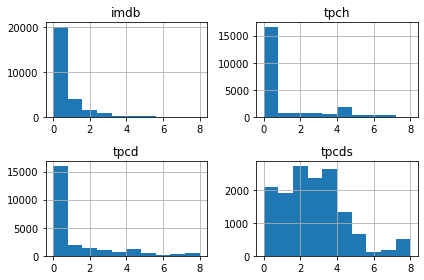

In [11]:
fig, ax = plt.subplots(2,2)

for idx, df in enumerate(dfs):
    df['bucket'] = df.runtime.apply(np.log2).apply(lambda x: min(x, 8)).apply(lambda x: max(0, x))

    ax[idx // 2][idx % 2].title.set_text(dss[idx].name)
    df.bucket.hist(ax=ax[idx // 2][idx % 2])

fig.tight_layout()


## Tree Data

In [12]:
def tree_density(n, h):
    return (n - h)/(2 ** (h + 1) - h - 1)

def calc_query_stat(_df):
    query_stats_df = pd.DataFrame()
    for index, row in tqdm(_df.iterrows(), total=_df.shape[0]):
        query = row['query'].strip()

        try:
            rel_tree = SQLParser.to_relational_tree(query)

            copied = row.copy()
            copied['tree'] = rel_tree
            copied['nodes'] = len(rel_tree)
            copied['relations'] = len(rel_tree.relations)
            copied['projections'] = len(rel_tree.get_projections())
            copied['selections'] = len(rel_tree.get_selections(include_joins=False))
            copied['joins'] = len(rel_tree.get_joins())
            copied['depth'] = rel_tree.depth()
            copied['density'] = tree_density(copied['nodes'], copied['depth'])
            
            rel_tree.optimize()
            copied['optimized_nodes'] = len(rel_tree)
            copied['optimized_depth'] = rel_tree.depth()
            
            query_stats_df = query_stats_df.append(copied)
        except Exception as e:
            print(e)
            break
        
    return query_stats_df

In [13]:
enchanced_dfs = [calc_query_stat(df) for df in dfs]

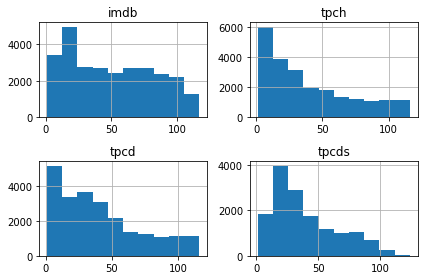

In [16]:
plot_hists(dss, enchanced_dfs, 'depth')

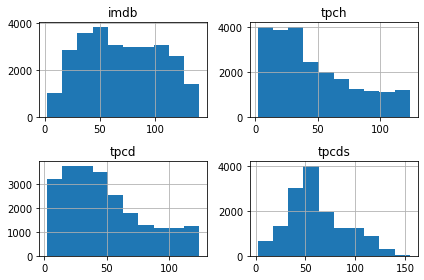

In [19]:
plot_hists(dss, enchanced_dfs, 'nodes')

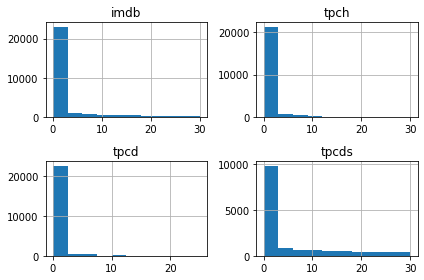

In [17]:
plot_hists(dss, enchanced_dfs, 'selections')

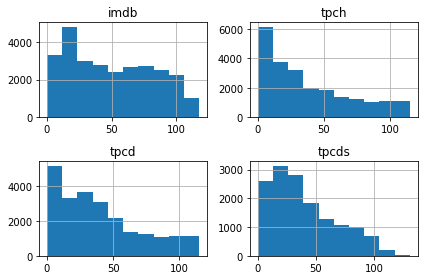

In [18]:
plot_hists(dss, enchanced_dfs, 'joins')

# Save Optimized

In [42]:
from pathlib import Path
        

In [40]:
ds = datasets.QueriesDataset('imdb:optimized')
ds.df = imdb_query_stats[['query','runtime']].copy()
ds.groom_()

ds.save()

100%|██████████| 27512/27512 [07:20<00:00, 62.48it/s]  


In [ ]:
ds = datasets.QueriesDataset('tpch:optimized')
ds.df = tpch_query_stats[['query','runtime']].copy()
ds.groom_()
Path(ds.input_path).mkdir(parents=True, exist_ok=True)
ds.save()

In [44]:
ds = datasets.QueriesDataset('tpcd:optimized')
ds.df = tpcd_query_stats[['query','runtime']].copy()
ds.groom_()
Path(ds.input_path).mkdir(parents=True, exist_ok=True)
ds.save()

100%|██████████| 23635/23635 [05:20<00:00, 73.83it/s] 


In [45]:
ds = datasets.QueriesDataset('tpcds:optimized')
ds.df = tpcds_query_stats[['query','runtime']].copy()
ds.groom_()
Path(ds.input_path).mkdir(parents=True, exist_ok=True)
ds.save()

100%|██████████| 14676/14676 [03:12<00:00, 76.40it/s] 


# Partition By nodes

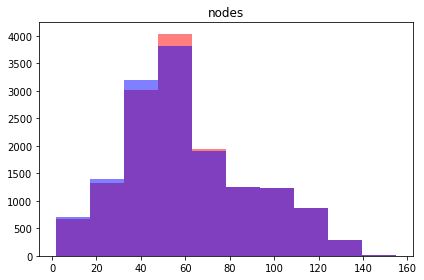

(count    27512.000000
 mean        69.807248
 std         34.857431
 min          2.000000
 25%         40.000000
 50%         67.000000
 75%        100.000000
 max        140.000000
 Name: optimized_nodes, dtype: float64,
 count    27512.000000
 mean        70.110861
 std         34.620344
 min          2.000000
 25%         41.000000
 50%         68.000000
 75%        100.000000
 max        140.000000
 Name: nodes, dtype: float64)

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.title.set_text('nodes')
ax.hist(imdb_query_stats['nodes'], alpha=0.5, color='red')
ax.hist(imdb_query_stats['optimized_nodes'],alpha=0.5, color='blue')
fig.tight_layout()

plt.show()

imdb_query_stats['optimized_nodes'].describe(), imdb_query_stats['nodes'].describe()

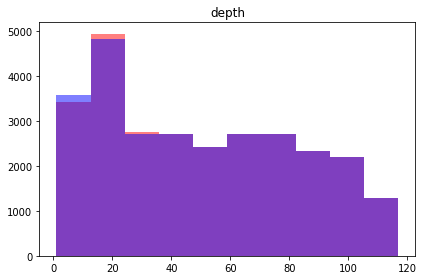

(count    27512.000000
 mean        50.393574
 std         32.179563
 min          1.000000
 25%         20.000000
 50%         47.000000
 75%         78.000000
 max        117.000000
 Name: optimized_depth, dtype: float64,
 count    27512.000000
 mean        50.469613
 std         32.094459
 min          1.000000
 25%         20.000000
 50%         47.000000
 75%         78.000000
 max        117.000000
 Name: depth, dtype: float64)

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.title.set_text('depth')
ax.hist(imdb_query_stats['depth'], alpha=0.5, color='red')
ax.hist(imdb_query_stats['optimized_depth'],alpha=0.5, color='blue')
fig.tight_layout()

plt.show()

imdb_query_stats['optimized_depth'].describe(), imdb_query_stats['depth'].describe()

---

# Split filtes

In [34]:
import os

In [36]:
os.path.dirname(os.path.dirname(ds.meta_path))

'/Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution'

In [68]:
def make_splits(origin_ds, df, schema_base):
    splits = [
        ('opt_depth_15_to_30', 'depth >= 15 and depth <= 30'),
        ('opt_depth_above_30', 'depth > 30'),
        ('opt_depth_under_15', 'depth < 15'),
        ('opt_joins_3_to_9', 'joins >= 3 and joins <= 9'),
        ('opt_joins_above_9', 'joins > 9'),
        ('opt_joins_under_3', 'joins < 3'),
        ('opt_nodes_50_to_100', 'nodes >= 50 and nodes <= 100'),
        ('opt_nodes_above_100', 'nodes > 100'),
        ('opt_nodes_under_50', 'nodes < 50'),
        ('opt_selections_above_25_perc', 'selections / joins >= 0.25'),
        ('opt_selections_under_25_perc', 'selections / joins < 0.25')
    ]


    for split in splits:
        split_name, split_query = split
        ds = datasets.QueriesDataset(f'{schema_base}:{split_name}')
        ds.df = df.query(split_query)[['query','runtime']].copy()
        print(f'db: {schema_base}, query: {split_name}, rows:{ds.df.count()[0]}')
        ds.save(schema=origin_ds.schema())

In [69]:
make_splits(ds_imdb, imdb_query_stats, 'imdb')

db: imdb, query: opt_depth_15_to_30, rows:5508
db: imdb, query: opt_depth_above_30, rows:17586
db: imdb, query: opt_depth_under_15, rows:4418
db: imdb, query: opt_joins_3_to_9, rows:2225
db: imdb, query: opt_joins_above_9, rows:24997
db: imdb, query: opt_joins_under_3, rows:290
db: imdb, query: opt_nodes_50_to_100, rows:11738
db: imdb, query: opt_nodes_above_100, rows:6652
db: imdb, query: opt_nodes_under_50, rows:9122
db: imdb, query: opt_selections_above_25_perc, rows:4153
db: imdb, query: opt_selections_under_25_perc, rows:23353


In [70]:
make_splits(ds_tpch, tpch_query_stats, 'tpch')

db: tpch, query: opt_depth_15_to_30, rows:5311
db: tpch, query: opt_depth_above_30, rows:10742
db: tpch, query: opt_depth_under_15, rows:6676
db: tpch, query: opt_joins_3_to_9, rows:4201
db: tpch, query: opt_joins_above_9, rows:17567
db: tpch, query: opt_joins_under_3, rows:961
db: tpch, query: opt_nodes_50_to_100, rows:6376
db: tpch, query: opt_nodes_above_100, rows:2234
db: tpch, query: opt_nodes_under_50, rows:14119
db: tpch, query: opt_selections_above_25_perc, rows:1881
db: tpch, query: opt_selections_under_25_perc, rows:20821


In [71]:
make_splits(ds_tpcds, tpcds_query_stats, 'tpcds')

db: tpcds, query: opt_depth_15_to_30, rows:5005
db: tpcds, query: opt_depth_above_30, rows:7424
db: tpcds, query: opt_depth_under_15, rows:2247
db: tpcds, query: opt_joins_3_to_9, rows:1281
db: tpcds, query: opt_joins_above_9, rows:13168
db: tpcds, query: opt_joins_under_3, rows:227
db: tpcds, query: opt_nodes_50_to_100, rows:7190
db: tpcds, query: opt_nodes_above_100, rows:1863
db: tpcds, query: opt_nodes_under_50, rows:5623
db: tpcds, query: opt_selections_above_25_perc, rows:4195
db: tpcds, query: opt_selections_under_25_perc, rows:10476


In [72]:
make_splits(ds_tpcd, tpcd_query_stats, 'tpcd')

db: tpcd, query: opt_depth_15_to_30, rows:4857
db: tpcd, query: opt_depth_above_30, rows:12810
db: tpcd, query: opt_depth_under_15, rows:5968
db: tpcd, query: opt_joins_3_to_9, rows:3545
db: tpcd, query: opt_joins_above_9, rows:19291
db: tpcd, query: opt_joins_under_3, rows:799
db: tpcd, query: opt_nodes_50_to_100, rows:7244
db: tpcd, query: opt_nodes_above_100, rows:2333
db: tpcd, query: opt_nodes_under_50, rows:14058
db: tpcd, query: opt_selections_above_25_perc, rows:1283
db: tpcd, query: opt_selections_under_25_perc, rows:22333


---

# Best tranform function

<AxesSubplot:>

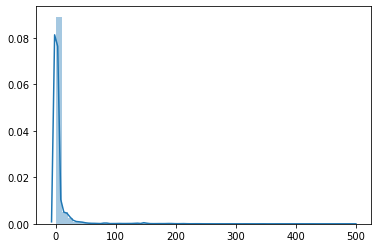

In [39]:
import seaborn as sns
sns.distplot(x)

In [15]:
x = list(df_imdb.runtime) + list(df_tpch.runtime) + list(df_tpch_atl.runtime) + list(df_tpch_alt_val.runtime) + list(df_tpcds.runtime) + list(df_tpcd.runtime)

In [18]:
x = np.array(x)

<AxesSubplot:>

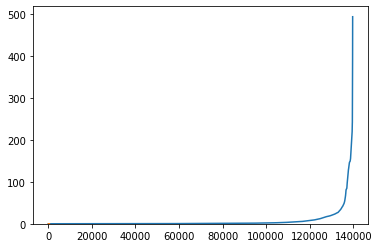

In [41]:
plt.plot(sorted(x))

<AxesSubplot:>

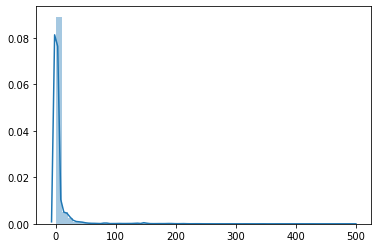

In [50]:
sns.distplot(x)

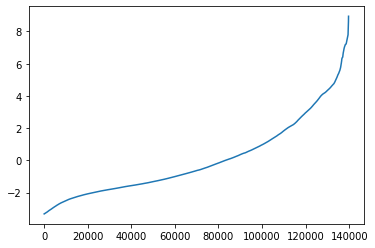

In [23]:
plt.plot(sorted(np.log2(x)))

<AxesSubplot:>

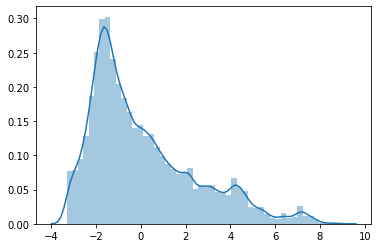

In [43]:
sns.distplot(np.log2(x))

-0.30333549542192006


(0.38651041122983004, 0.6510220000000001)

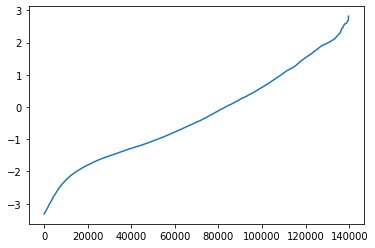

In [68]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
bc_x = boxcox(x, -0.3)
plt.plot(sorted(bc_x))
print(lmbda)
inv_boxcox([-1.1], -.3)[0], x[0] 

<AxesSubplot:>

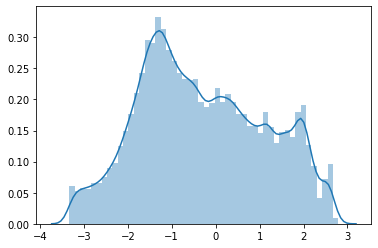

In [45]:
sns.distplot(bc_x)

<AxesSubplot:>

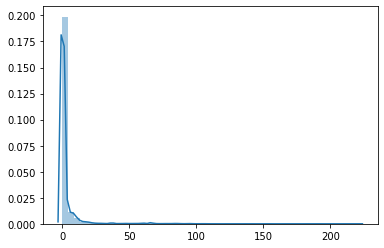

In [51]:
from sklearn.preprocessing import RobustScaler
norm = RobustScaler()
norm.fit(x.reshape(-1, 1))

x_norm = norm.transform(x.reshape(-1, 1))
sns.distplot(x_norm)